### DOMAIN: Electronics and Telecommunication
### CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting 
informative signals. Company wants to build a machine learning model which can help the company to predict the 
equipment’s signal quality using various parameters. 
#### DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality
#### PROJECT OBJECTIVE:
The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].
Steps and tasks: [ Total Score: 10 points]
1. Import data.
2. Data analysis & visualisation
• Perform relevant and detailed statistical analysis on the data.
• Perform relevant and detailed uni, bi and multi variate analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better 
analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns. 
3. Design, train, tune and test a neural network regressor. 
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.
4. Pickle the model for future use

## Step 1 import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##tensorflow
import tensorflow
tensorflow.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras import initializers, optimizers,callbacks
from tensorflow.keras.utils import to_categorical
from keras.models import model_from_json
import tkinter as tk
import tkinter as ttk
import re

In [134]:
# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.5f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## Step2 : import data

In [135]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [136]:
data=pd.read_csv('/content/gdrive/MyDrive/Part- 1,2&3 - Signal.csv')
data.shape

(1599, 12)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Summary : data has 11 signal parameters
and Target variable in integer and has 6 values

In [138]:
#checking values of Signal_Strength  
data['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

### Step 3: Understand data

In [139]:
#checking for null
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

data has no missing values

In [140]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000
mean,8.31964,0.52782,0.27098,2.53881,0.08747,15.87492,46.46779,0.99675,3.31111,0.65815,10.42298,5.63602
std,1.74110,0.17906,0.19480,1.40993,0.04707,10.46016,32.89532,0.00189,0.15439,0.16951,1.06567,0.80757
min,4.60000,0.12000,0.00000,0.90000,0.01200,1.00000,6.00000,0.99007,2.74000,0.33000,8.40000,3.00000
25%,7.10000,0.39000,0.09000,1.90000,0.07000,7.00000,22.00000,0.99560,3.21000,0.55000,9.50000,5.00000
50%,7.90000,0.52000,0.26000,2.20000,0.07900,14.00000,38.00000,0.99675,3.31000,0.62000,10.20000,6.00000
75%,9.20000,0.64000,0.42000,2.60000,0.09000,21.00000,62.00000,0.99783,3.40000,0.73000,11.10000,6.00000
max,15.90000,1.58000,1.00000,15.50000,0.61100,72.00000,289.00000,1.00369,4.01000,2.00000,14.90000,8.00000


All dependent variables have very different scale. will need normalization before passing to network

### Step :4 visualisation

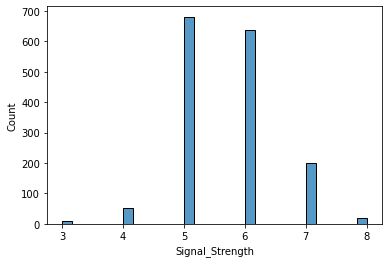

In [141]:
sns.histplot(data['Signal_Strength'])

distribution of Signal_Strength is symetric

Text(0.5, 1.0, 'Third Sensor Measurements')

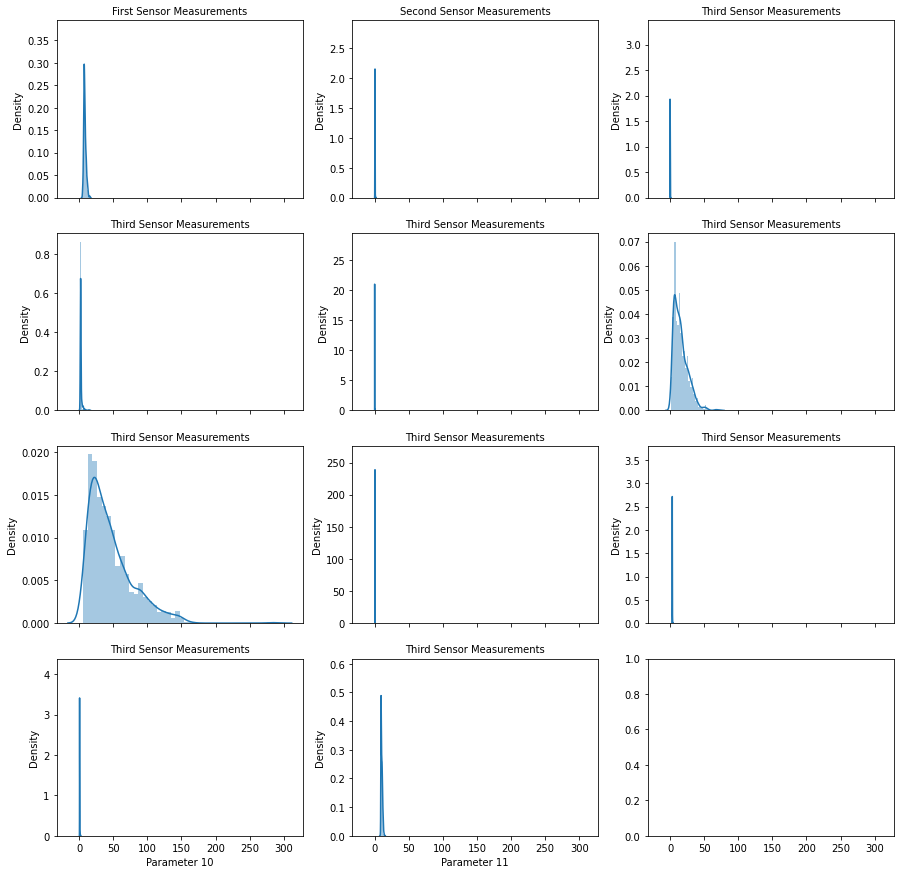

In [142]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
sns.distplot(data['Parameter 1'],ax=axes[0,0]).set_title('First Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 2'],ax=axes[0,1]).set_title('Second Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 3'],ax=axes[0,2]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 4'],ax=axes[1,0]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 5'],ax=axes[1,1]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 6'],ax=axes[1,2]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 7'],ax=axes[2,0]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 8'],ax=axes[2,1]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 9'],ax=axes[2,2]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 10'],ax=axes[3,0]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 11'],ax=axes[3,1]).set_title('Third Sensor Measurements',fontsize = 10)

In [143]:
##Divide the data set into Train and test sets

In [144]:
data1=data.drop('Signal_Strength', axis=1)
X_train, X_test, y_train,y_test=train_test_split(data1, data['Signal_Strength'],test_size=0.3, random_state=4)
X_train.shape

(1119, 11)

In [145]:
## Standardize data
# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=data1.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test), columns=data1.columns)

In [146]:
## visulization after standardiztion

Text(0.5, 1.0, '11-Sensor Measurements')

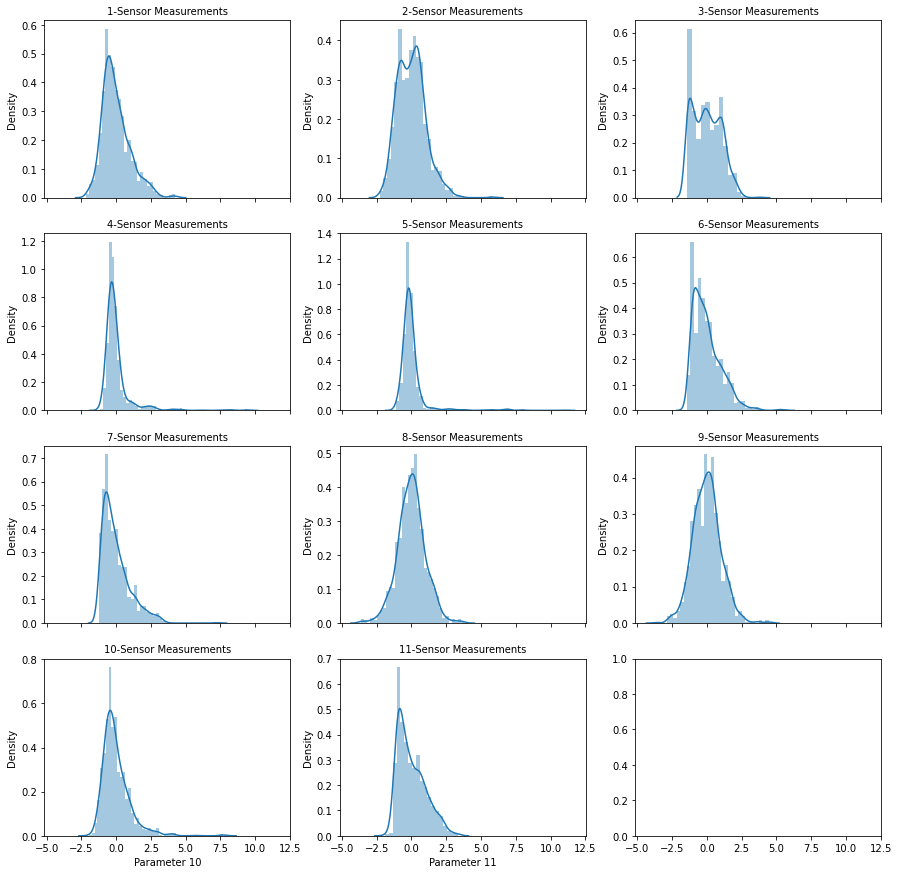

In [147]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
sns.distplot(X_train['Parameter 1'],ax=axes[0,0]).set_title('1-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 2'],ax=axes[0,1]).set_title('2-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 3'],ax=axes[0,2]).set_title('3-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 4'],ax=axes[1,0]).set_title('4-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 5'],ax=axes[1,1]).set_title('5-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 6'],ax=axes[1,2]).set_title('6-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 7'],ax=axes[2,0]).set_title('7-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 8'],ax=axes[2,1]).set_title('8-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 9'],ax=axes[2,2]).set_title('9-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 10'],ax=axes[3,0]).set_title('10-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 11'],ax=axes[3,1]).set_title('11-Sensor Measurements',fontsize = 10)

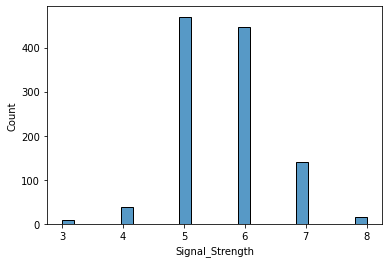

In [148]:
sns.histplot(y_train)

Text(0.5, 1.0, '11-Sensor Measurements')

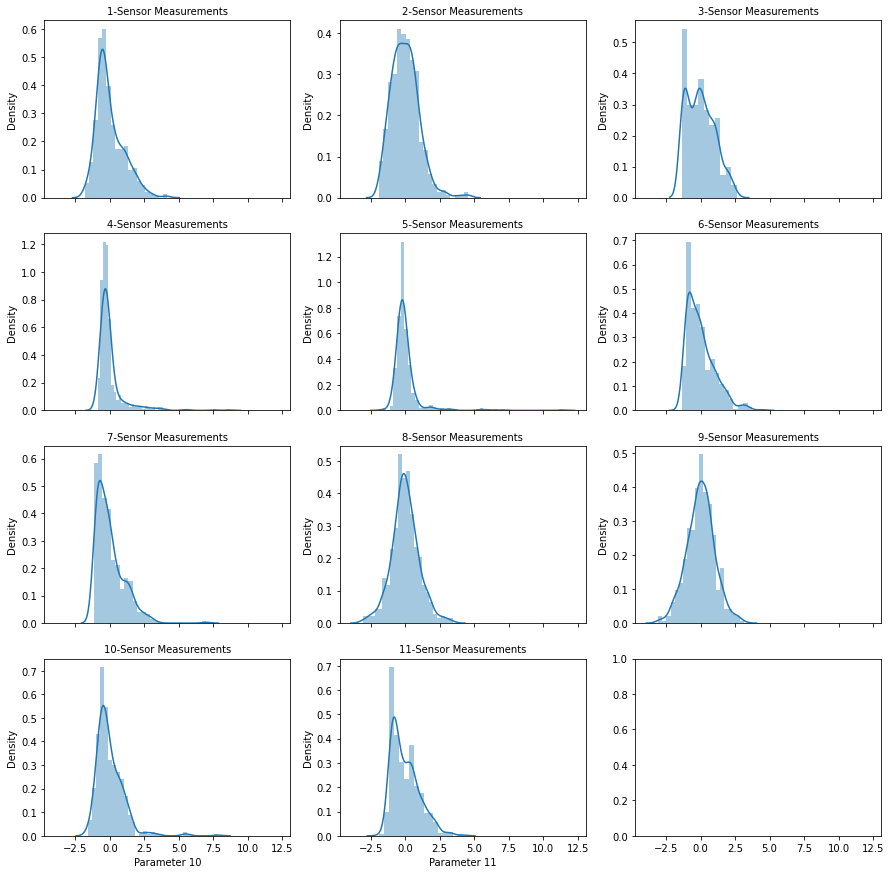

In [149]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
sns.distplot(X_test['Parameter 1'],ax=axes[0,0]).set_title('1-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 2'],ax=axes[0,1]).set_title('2-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 3'],ax=axes[0,2]).set_title('3-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 4'],ax=axes[1,0]).set_title('4-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 5'],ax=axes[1,1]).set_title('5-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 6'],ax=axes[1,2]).set_title('6-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 7'],ax=axes[2,0]).set_title('7-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 8'],ax=axes[2,1]).set_title('8-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 9'],ax=axes[2,2]).set_title('9-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 10'],ax=axes[3,0]).set_title('10-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 11'],ax=axes[3,1]).set_title('11-Sensor Measurements',fontsize = 10)

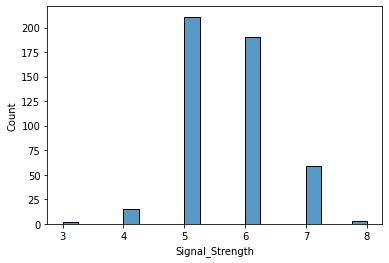

In [150]:
sns.histplot(y_test)

1. Distribution of dependent variables is similar for train and test
2. train and test both feature and target has similar distribution

### Step :5 Build Regression model

In [151]:
### Initialize & build the model

In [152]:
# Initialize Sequential model
model_1 = tensorflow.keras.models.Sequential()

# Normalize input data

model_1.add(Dense(activation = 'relu', input_dim = 11, units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_1.add(BatchNormalization())
model_1.add(Dense(activation = 'relu', input_dim =9, units=7, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_1.add(BatchNormalization())
model_1.add(Dense(activation = 'relu', input_dim =7, units=5, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_1.add(BatchNormalization())
# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_1.add(tensorflow.keras.layers.Dense(1))

In [153]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 9)                 108       
_________________________________________________________________
batch_normalization_38 (Batc (None, 9)                 36        
_________________________________________________________________
dense_49 (Dense)             (None, 7)                 70        
_________________________________________________________________
batch_normalization_39 (Batc (None, 7)                 28        
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 40        
_________________________________________________________________
batch_normalization_40 (Batc (None, 5)                 20        
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [154]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_1.compile(optimizer='sgd', loss='mae',metrics=['MeanAbsoluteError'])
history=model_1.fit(X_train, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 1s 15ms/step - loss: 5.4869 - mean_absolute_error: 5.4869 - val_loss: 4.9492 - val_mean_absolute_error: 4.9492
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 4.7417 - mean_absolute_error: 4.7417 - val_loss: 4.1580 - val_mean_absolute_error: 4.1580
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 3.9518 - mean_absolute_error: 3.9518 - val_loss: 3.1492 - val_mean_absolute_error: 3.1492
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 2.8591 - mean_absolute_error: 2.8591 - val_loss: 1.7929 - val_mean_absolute_error: 1.7929
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 1.4743 - mean_absolute_error: 1.4743 - val_loss: 0.7086 - val_mean_absolute_error: 0.7086
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - val_loss: 0.6990 - val_mean_absolute_error: 0.6990
Epoch 7/100
23/23 [==

In [155]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


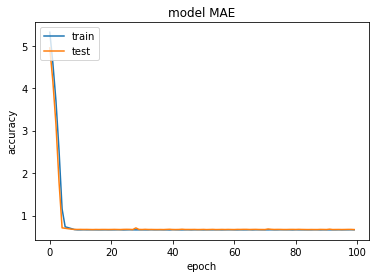

In [156]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [157]:
# evaluate the model
scores = model_1.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

mean_absolute_error: 65.03%


In [158]:
from keras.models import model_from_json

In [159]:
y_test_pred=np.round(model_1.predict(X_test))
y_test_pred[0:10]

array([[6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.],
       [6.]], dtype=float32)

In [160]:
# Initialize Sequential model
model_2 = tensorflow.keras.models.Sequential()

# Normalize input data

model_2.add(Dense(activation = 'relu', input_dim = 11, units=55, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(activation = 'relu', input_dim =55, units=33, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(activation = 'relu', input_dim =33, units=11, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(activation = 'relu', input_dim =11, units=7, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_2.add(BatchNormalization())
model_2.add(Dense(activation = 'relu', input_dim =7, units=5, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model_2.add(BatchNormalization())
# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_2.add(tensorflow.keras.layers.Dense(1))

In [161]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
optimizer = optimizers.SGD(lr=0.01)
model_2.compile(optimizer=optimizer, loss='mae',metrics=['MeanAbsoluteError'])
history=model_2.fit(X_train, y_train, epochs=100, validation_split=0.35,callbacks=[callback])

Epoch 1/100
23/23 [==============================] - 2s 17ms/step - loss: 5.4376 - mean_absolute_error: 5.4376 - val_loss: 5.0428 - val_mean_absolute_error: 5.0428
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 4.8960 - mean_absolute_error: 4.8960 - val_loss: 4.3649 - val_mean_absolute_error: 4.3649
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 4.1316 - mean_absolute_error: 4.1316 - val_loss: 3.5135 - val_mean_absolute_error: 3.5135
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 3.3081 - mean_absolute_error: 3.3081 - val_loss: 2.3721 - val_mean_absolute_error: 2.3721
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 2.0478 - mean_absolute_error: 2.0478 - val_loss: 1.0314 - val_mean_absolute_error: 1.0314
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 1.0559 - mean_absolute_error: 1.0559 - val_loss: 0.6947 - val_mean_absolute_error: 0.6947
Epoch 7/100
23/23 [==

In [162]:
# evaluate the model
scores = model_2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

mean_absolute_error: 47.29%


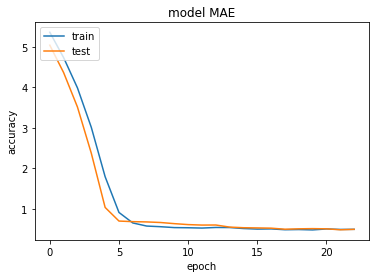

In [163]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Summary : neural netwrok with more neurons and early stopping is performing better, shows less MAE for test than train

In [164]:
# serialize model to JSON
model_json = model_1.to_json()
with open("reg_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_1.save_weights("reg_model_weight.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('reg_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("reg_model_weight.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


## ********************************Part 2 *********************************** ##

## Step2 : import data

In [165]:
## import data
data=pd.read_csv('/content/gdrive/MyDrive/Part- 1,2&3 - Signal.csv')
data.shape

(1599, 12)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Summary : 
1. data has 11 signal parameters and Target variable in integer and has 6 values
2. all variable are float except signal_strength

In [167]:
#checking values of Signal_Strength  
data['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

1.Signal_Strength is integer and has limited values

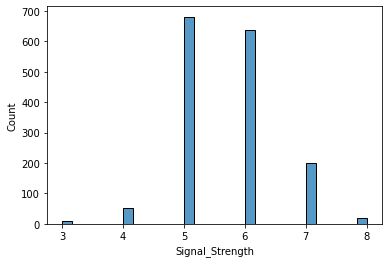

In [168]:
sns.histplot(data['Signal_Strength'])

In [169]:
#checking for null
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

data has no missing values

In [170]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000,1599.00000
mean,8.31964,0.52782,0.27098,2.53881,0.08747,15.87492,46.46779,0.99675,3.31111,0.65815,10.42298,5.63602
std,1.74110,0.17906,0.19480,1.40993,0.04707,10.46016,32.89532,0.00189,0.15439,0.16951,1.06567,0.80757
min,4.60000,0.12000,0.00000,0.90000,0.01200,1.00000,6.00000,0.99007,2.74000,0.33000,8.40000,3.00000
25%,7.10000,0.39000,0.09000,1.90000,0.07000,7.00000,22.00000,0.99560,3.21000,0.55000,9.50000,5.00000
50%,7.90000,0.52000,0.26000,2.20000,0.07900,14.00000,38.00000,0.99675,3.31000,0.62000,10.20000,6.00000
75%,9.20000,0.64000,0.42000,2.60000,0.09000,21.00000,62.00000,0.99783,3.40000,0.73000,11.10000,6.00000
max,15.90000,1.58000,1.00000,15.50000,0.61100,72.00000,289.00000,1.00369,4.01000,2.00000,14.90000,8.00000


All dependent variables have very different scale. will need normalization before passing to network

## Step :3 visualisation

Text(0.5, 1.0, 'Third Sensor Measurements')

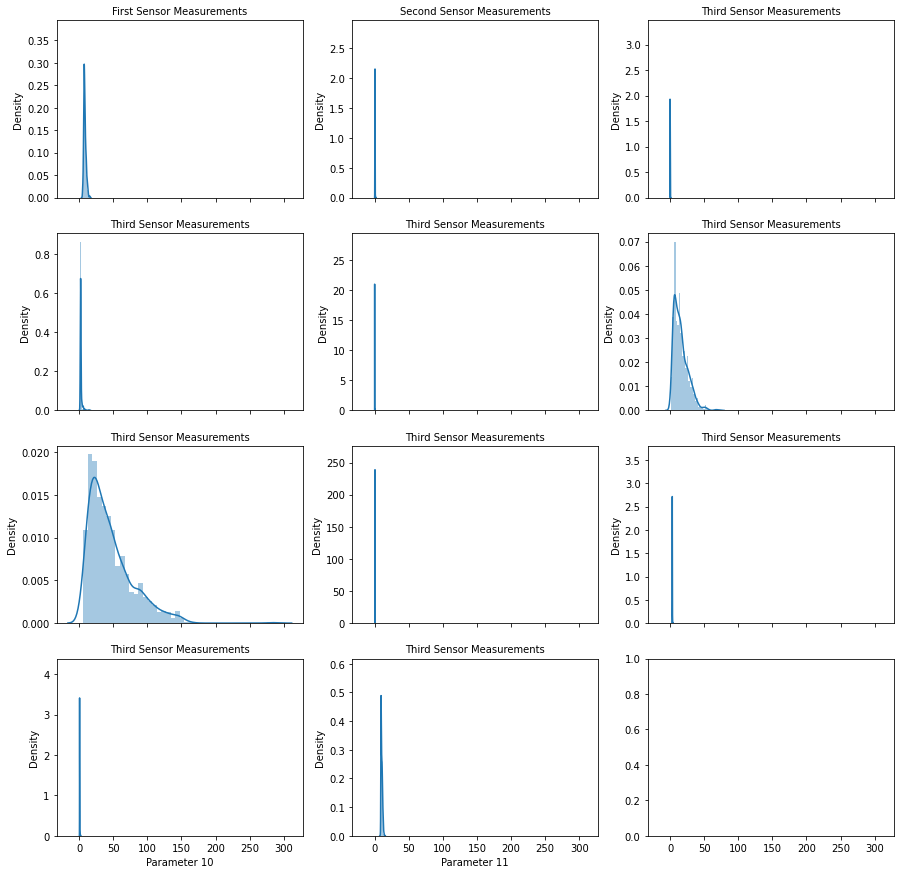

In [171]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
sns.distplot(data['Parameter 1'],ax=axes[0,0]).set_title('First Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 2'],ax=axes[0,1]).set_title('Second Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 3'],ax=axes[0,2]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 4'],ax=axes[1,0]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 5'],ax=axes[1,1]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 6'],ax=axes[1,2]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 7'],ax=axes[2,0]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 8'],ax=axes[2,1]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 9'],ax=axes[2,2]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 10'],ax=axes[3,0]).set_title('Third Sensor Measurements',fontsize = 10)
sns.distplot(data['Parameter 11'],ax=axes[3,1]).set_title('Third Sensor Measurements',fontsize = 10)

In [172]:
##Divide the data set into Train and test sets

In [173]:
data1=data.drop('Signal_Strength', axis=1)
X_train, X_test, y_train,y_test=train_test_split(data1, data['Signal_Strength'],test_size=0.3, random_state=4)
X_train.shape

(1119, 11)

In [174]:
## Standardize data

In [175]:
from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=data1.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test), columns=data1.columns)

Text(0.5, 1.0, '11-Sensor Measurements')

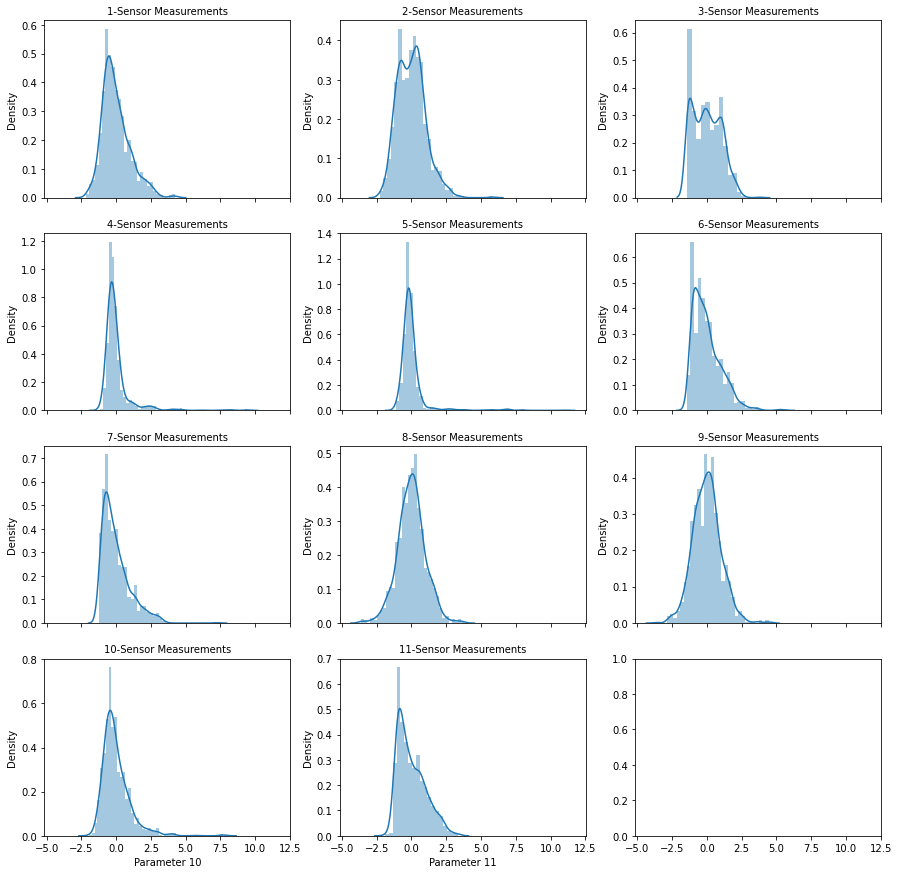

In [176]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
sns.distplot(X_train['Parameter 1'],ax=axes[0,0]).set_title('1-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 2'],ax=axes[0,1]).set_title('2-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 3'],ax=axes[0,2]).set_title('3-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 4'],ax=axes[1,0]).set_title('4-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 5'],ax=axes[1,1]).set_title('5-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 6'],ax=axes[1,2]).set_title('6-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 7'],ax=axes[2,0]).set_title('7-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 8'],ax=axes[2,1]).set_title('8-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 9'],ax=axes[2,2]).set_title('9-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 10'],ax=axes[3,0]).set_title('10-Sensor Measurements',fontsize = 10)
sns.distplot(X_train['Parameter 11'],ax=axes[3,1]).set_title('11-Sensor Measurements',fontsize = 10)

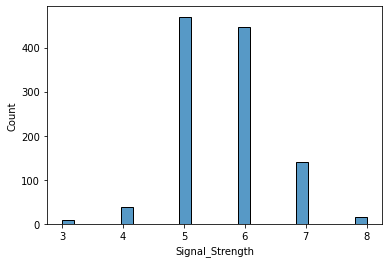

In [177]:
sns.histplot(y_train)

Text(0.5, 1.0, '11-Sensor Measurements')

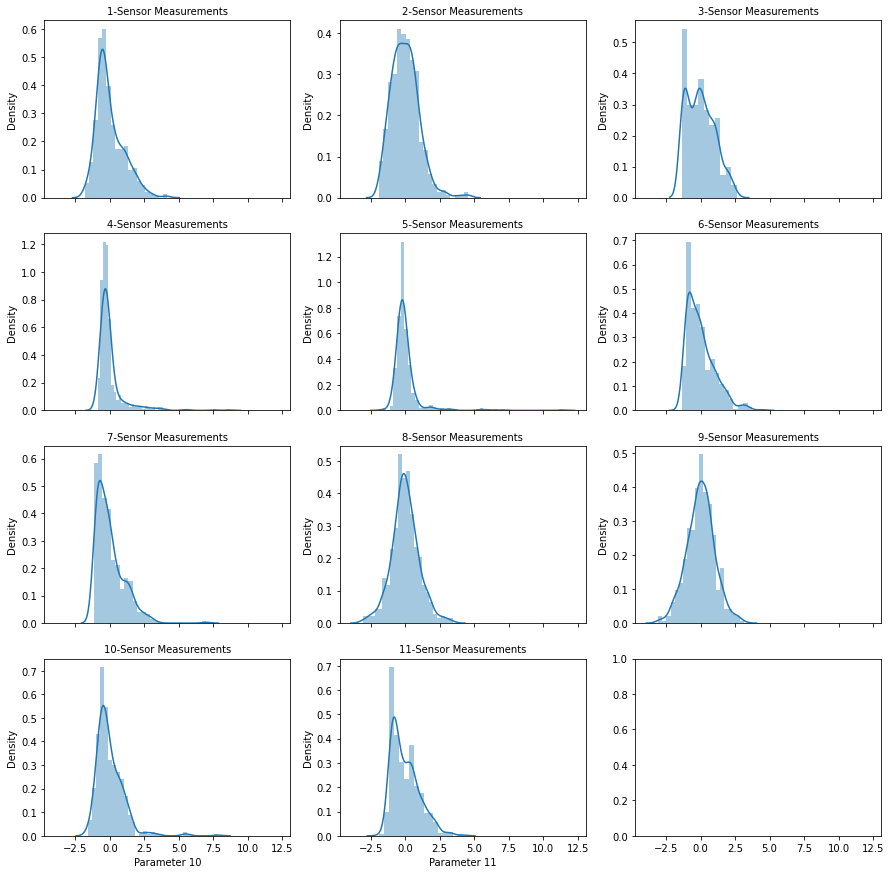

In [178]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
sns.distplot(X_test['Parameter 1'],ax=axes[0,0]).set_title('1-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 2'],ax=axes[0,1]).set_title('2-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 3'],ax=axes[0,2]).set_title('3-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 4'],ax=axes[1,0]).set_title('4-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 5'],ax=axes[1,1]).set_title('5-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 6'],ax=axes[1,2]).set_title('6-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 7'],ax=axes[2,0]).set_title('7-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 8'],ax=axes[2,1]).set_title('8-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 9'],ax=axes[2,2]).set_title('9-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 10'],ax=axes[3,0]).set_title('10-Sensor Measurements',fontsize = 10)
sns.distplot(X_test['Parameter 11'],ax=axes[3,1]).set_title('11-Sensor Measurements',fontsize = 10)

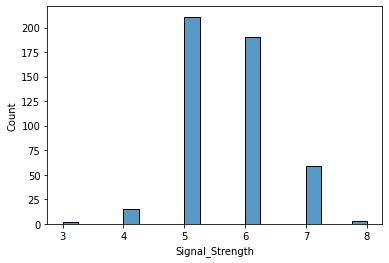

In [179]:
sns.histplot(y_test)

1. Distribution of dependent variables is similar for train and test
2. train and test both feature and target has similar distribution

In [180]:
y_train1 = to_categorical(np.array(y_train), num_classes=9)
y_test1 = to_categorical(np.array(y_test), num_classes=9)

print("Shape of y_train:", y_train1.shape)
print("One value of y_train:", y_train1[3])

Shape of y_train: (1119, 9)
One value of y_train: [0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [181]:
### Initialize & build the model

In [182]:
# Initialize Sequential model

class_model_1 = tensorflow.keras.models.Sequential()
class_model_1.add(Dense(activation = 'relu', input_dim = 11, units=9))
class_model_1.add(BatchNormalization())
class_model_1.add(Dense(activation = 'relu', input_dim =9, units=7))
class_model_1.add(BatchNormalization())
class_model_1.add(Dropout(0.5))
class_model_1.add(Dense(activation = 'relu', input_dim =7, units=9))
class_model_1.add(BatchNormalization())
# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
class_model_1.add(tensorflow.keras.layers.Dense(9, activation="softmax"))
class_model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 9)                 108       
_________________________________________________________________
batch_normalization_46 (Batc (None, 9)                 36        
_________________________________________________________________
dense_59 (Dense)             (None, 7)                 70        
_________________________________________________________________
batch_normalization_47 (Batc (None, 7)                 28        
_________________________________________________________________
dropout_11 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 9)                 72        
_________________________________________________________________
batch_normalization_48 (Batc (None, 9)               

In [183]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
# Compile the model

# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
optimizer = optimizers.SGD(lr=0.0001)
class_model_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Fit the model
class_model_1.fit(x=X_train, y=y_train1,epochs=20, validation_data=(X_test, y_test1),callbacks=[callback])

Epoch 1/20
35/35 [==============================] - 1s 10ms/step - loss: 2.6014 - accuracy: 0.2192 - val_loss: 2.3081 - val_accuracy: 0.1688
Epoch 2/20
35/35 [==============================] - 0s 5ms/step - loss: 2.6067 - accuracy: 0.2188 - val_loss: 2.2511 - val_accuracy: 0.2354
Epoch 3/20
35/35 [==============================] - 0s 5ms/step - loss: 2.5953 - accuracy: 0.2165 - val_loss: 2.2193 - val_accuracy: 0.2604
Epoch 4/20
35/35 [==============================] - 0s 5ms/step - loss: 2.6006 - accuracy: 0.2205 - val_loss: 2.2174 - val_accuracy: 0.2646
Epoch 5/20
35/35 [==============================] - 0s 5ms/step - loss: 2.5568 - accuracy: 0.1974 - val_loss: 2.2318 - val_accuracy: 0.2500
Epoch 6/20
35/35 [==============================] - 0s 5ms/step - loss: 2.5701 - accuracy: 0.2059 - val_loss: 2.2479 - val_accuracy: 0.2417


In [184]:
# evaluate the model
scores = class_model_1.evaluate(X_test, y_test1, verbose=0)
print("%s: %.2f%%" % (class_model_1.metrics_names[1], scores[1]*100))

accuracy: 24.17%


In [185]:
## iteraton 2
class_model_2 = Sequential()
class_model_2.add(Dense(activation = 'sigmoid', input_dim = 11, units=15,kernel_initializer=initializers.GlorotNormal()))
class_model_2.add(BatchNormalization())
class_model_2.add(Dense(activation="sigmoid",input_dim = 15, units=11,kernel_initializer=initializers.GlorotNormal()))
class_model_2.add(BatchNormalization())
class_model_2.add(Dense(activation="sigmoid",input_dim = 11, units=9,kernel_initializer=initializers.GlorotNormal()))
class_model_2.add(BatchNormalization())
class_model_2.add(Dense(9, activation="softmax"))

# Compile the model
class_model_2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.Adam(lr = 0.001))
# Fit the model
#model.fit(x=X_train, y=y_train1, batch_size=32, epochs=40, validation_data=(X_test, y_test1))
class_model_2.fit(x=X_train, y=y_train1,epochs=100, validation_data=(X_test, y_test1),callbacks=[callback])

Epoch 1/100
35/35 [==============================] - 1s 10ms/step - loss: 2.7042 - accuracy: 0.1039 - val_loss: 2.2533 - val_accuracy: 0.0312
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 2.2323 - accuracy: 0.1650 - val_loss: 2.1374 - val_accuracy: 0.0312
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 1.9722 - accuracy: 0.3349 - val_loss: 2.0277 - val_accuracy: 0.0312
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 1.7684 - accuracy: 0.4576 - val_loss: 1.9159 - val_accuracy: 0.4375
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 1.6590 - accuracy: 0.5085 - val_loss: 1.8074 - val_accuracy: 0.4437
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 1.5827 - accuracy: 0.4964 - val_loss: 1.6966 - val_accuracy: 0.4688
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 1.4488 - accuracy: 0.5656 - val_loss: 1.5816 - val_accuracy: 0.5229
Epoch 8/100


In [186]:
# evaluate the model
scores = class_model_2.evaluate(X_test, y_test1, verbose=0)
print("%s: %.2f%%" % (class_model_2.metrics_names[1], scores[1]*100))

accuracy: 59.38%


In [187]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)
class_weight={0:0,1:0,2:0,3:23.3125, 4:4.90789474, 5:0.39680851, 6:0.41629464,  7:1.33214286,8:12.43333333}
## iteraton 2
class_model_3 = Sequential()
class_model_3.add(Dense(activation = 'relu', input_dim = 11, units=55,kernel_initializer=initializers.GlorotNormal()))
class_model_3.add(BatchNormalization())
class_model_3.add(Dense(activation = 'relu', input_dim = 55, units=33,kernel_initializer=initializers.GlorotNormal()))
class_model_3.add(BatchNormalization())
class_model_3.add(Dense(activation = 'relu', input_dim = 33, units=22,kernel_initializer=initializers.GlorotNormal()))
class_model_3.add(BatchNormalization())
class_model_3.add(Dense(activation="relu",input_dim = 22, units=11,kernel_initializer=initializers.GlorotNormal()))
class_model_3.add(BatchNormalization())
class_model_3.add(Dense(activation="relu",input_dim = 11, units=9,kernel_initializer=initializers.GlorotNormal()))
class_model_3.add(BatchNormalization())
class_model_3.add(Dense(9, activation="softmax"))

class_model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.Adam(lr = 0.01))
class_model_3.fit(x=X_train, y=y_train1,epochs=100, validation_data=(X_test, y_test1), class_weight=class_weight,callbacks=[callback])

Epoch 1/100
35/35 [==============================] - 2s 12ms/step - loss: 2.0478 - accuracy: 0.2262 - val_loss: 2.0056 - val_accuracy: 0.2542
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 1.7075 - accuracy: 0.3402 - val_loss: 1.9184 - val_accuracy: 0.2542
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 1.3702 - accuracy: 0.3982 - val_loss: 1.9116 - val_accuracy: 0.2812
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 1.3924 - accuracy: 0.3987 - val_loss: 1.7914 - val_accuracy: 0.2937
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 1.1956 - accuracy: 0.4078 - val_loss: 1.5478 - val_accuracy: 0.4021
Epoch 6/100
35/35 [==============================] - 0s 6ms/step - loss: 1.1068 - accuracy: 0.4646 - val_loss: 1.5420 - val_accuracy: 0.4062
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 1.1936 - accuracy: 0.4625 - val_loss: 2.5979 - val_accuracy: 0.2646
Epoch 8/100


In [188]:
# evaluate the model
scores = class_model_3.evaluate(X_test, y_test1, verbose=0)
print("%s: %.2f%%" % (class_model_3.metrics_names[1], scores[1]*100))

accuracy: 38.54%


In [189]:
from keras.models import model_from_json
# serialize model to JSON
model_json = class_model_2.to_json()
with open("class_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
class_model_2.save_weights("class_model_weight.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('class_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("class_model_weight.h5")
print("Loaded model from disk")


Saved model to disk
Loaded model from disk


Summary:
    1.Early stopping helps to converge faster and gives better results
    2.data has imbalanced target,model needs better strategy to handel imbalanced data.
    3. tried class weight and smote didnt give better results

## ********************************Part 3 *********************************** ##

In [190]:
#tkinter app

In [5]:
def center(e):
    w = int(root.winfo_width() / 3.5) # get root width and scale it ( in pixels )
    s = 'Neural Networks GUI- Great Learning'.rjust(w//2)
    win.title(s)
#app window
win=ttk.Tk()
width=win.winfo_screenwidth()
spacer=(" "*(int(width)//8))
win.title(spacer+"Neural Networks GUI- Great Learning")

# #step 1 : import data
static_name=ttk.Label(win, text='Step 1: File Name')
static_name.grid(row=0, column=1, sticky=tk.W)
## editable box
Name_var=tk.StringVar()
Name_Entrybox=ttk.Entry(win, width=20, textvariable=Name_var)
Name_Entrybox.grid(row=0, column=2, padx=20, pady=20,sticky=tk.W)

#actionable button
def Import_Data():
    global DB
    DF_Name=Name_var.get()
    DB_extention=re.findall("\..*",DF_Name)
    if DB_extention==['.xlsx']:
        DB=pd.read_excel(DF_Name)
    elif DB_extention==['.csv']:
        DB=pd.read_csv(DF_Name)
    confirm='Done'
    confirm_Entrybox=ttk.Entry(win, width=20)
    confirm_Entrybox.grid(row=0, column=6)
    confirm_Entrybox.insert(1,str(confirm))
    
Import_Data=ttk.Button(win,text='Import Data',width = 15, command=Import_Data)
Import_Data.grid(row=0, column=4, padx=20, pady=20,sticky=tk.W)
                 
# #step 2 : provide target details
target_name=ttk.Label(win, text='Step 2: Target Column')
target_name.grid(row=2, column=1, sticky=tk.W)

## editable box
target_var=tk.StringVar()
target_Entrybox=ttk.Entry(win, width=20, textvariable=target_var)
target_Entrybox.grid(row=2, column=2, padx=20, pady=20,sticky=tk.W)

#actionable button
def Import_Target():
    target_Name=target_var.get()
    if target_Name in DB.columns :
        print(target_Name)
        target_confirm='Found'
    target_confirm_Entrybox=ttk.Entry(win, width=20)
    target_confirm_Entrybox.grid(row=2, column=6)
    target_confirm_Entrybox.insert(1,str(target_confirm))
    
Import_target=ttk.Button(win,text='Import Target',width = 15, command=Import_Target)
Import_target.grid(row=2, column=4, padx=20, pady=20,sticky=tk.W)


# #step 3 : Neural Network process
NNReg_name=ttk.Label(win, text='Step 3: Neural Network Regressor')
NNReg_name.grid(row=4, column=1, sticky=tk.W)

def reg_train_model():
    global model
    data1=DB.drop('Signal_Strength', axis=1)
    X_train, X_test, y_train,y_test=train_test_split(data1, DB['Signal_Strength'],test_size=0.3, random_state=4)
    sc = StandardScaler()
    # fitting independent data to the model
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=data1.columns)
    X_test = pd.DataFrame(sc.fit_transform(X_test), columns=data1.columns)
    
    # Initialize Sequential model
    model = tensorflow.keras.models.Sequential()
    # Normalize input data
    model.add(Dense(activation = 'relu', input_dim = 11, units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Dense(activation = 'relu', input_dim =9, units=7, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    model.add(Dense(activation = 'relu', input_dim =7, units=5, kernel_initializer=initializers.RandomNormal(stddev=0.01)))
    model.add(BatchNormalization())
    # Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
    model.add(tensorflow.keras.layers.Dense(1))
    model.compile(optimizer='sgd', loss='mae',metrics=['MeanAbsoluteError'])
    model.fit(X_train, y_train, epochs=100, validation_split=0.35)
    train_network='Network Trained'
    train_network_Entrybox=ttk.Entry(win, width=20)
    train_network_Entrybox.grid(row=5, column=6)
    train_network_Entrybox.insert(1,str(train_network))
    

NNReg_model_name=ttk.Label(win, text='Regression')
NNReg_model_name.grid(row=5, column=1, sticky=tk.E)

NNReg_name_train=ttk.Button(win,text='Train',width = 15, command=reg_train_model)
NNReg_name_train.grid(row=5, column=2, padx=20, pady=20,sticky=tk.W)

def save_reg_model():
    # serialize model to JSON
    model_json = model.to_json()
    with open("reg_model_app.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("reg_model_weight_app.h5")
    print("Saved model to disk")
    reg_model_save='Saved model to disk'
    reg_model_save_Entrybox=ttk.Entry(win, width=20)
    reg_model_save_Entrybox.grid(row=6, column=6)
    reg_model_save_Entrybox.insert(1,str(reg_model_save))
    

NNReg_pickle_name=ttk.Label(win, text='Pickle')
NNReg_pickle_name.grid(row=6, column=1, sticky=tk.E)

NNReg_name_run=ttk.Button(win,text='Run',width = 15,command=save_reg_model)
NNReg_name_run.grid(row=6, column=2, padx=20, pady=20,sticky=tk.W)


# #step 4 : Neural Network classification
NNClass_name=ttk.Label(win, text='Step 4: Neural Network Classifier')
NNClass_name.grid(row=8, column=1, sticky=tk.W)

NNClass_model_name=ttk.Label(win, text='Classifier')
NNClass_model_name.grid(row=9, column=1, sticky=tk.E)
def class_train_model():
    global class_model
    data1=DB.drop('Signal_Strength', axis=1)
    X_train, X_test, y_train,y_test=train_test_split(data1, DB['Signal_Strength'],test_size=0.3, random_state=4)
    sc = StandardScaler()
    # fitting independent data to the model
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=data1.columns)
    X_test = pd.DataFrame(sc.fit_transform(X_test), columns=data1.columns)
    
    y_train1 = to_categorical(np.array(y_train), num_classes=9)
    y_test1 = to_categorical(np.array(y_test), num_classes=9)

    
    # Initialize Sequential model
    class_model = Sequential()
    class_model.add(Dense(activation = 'relu', input_dim = 11, units=15,kernel_initializer=initializers.HeNormal()))
    class_model.add(BatchNormalization())
    class_model.add(Dense(activation="relu",input_dim = 15, units=11,kernel_initializer=initializers.HeNormal()))
    class_model.add(BatchNormalization())
    class_model.add(Dense(activation="relu",input_dim = 11, units=9,kernel_initializer=initializers.HeNormal()))
    class_model.add(BatchNormalization())
    class_model.add(Dense(activation="relu",input_dim = 9, units=9,kernel_initializer=initializers.HeNormal()))
    class_model.add(Dropout(0.5))
    class_model.add(Dense(9, activation="softmax"))
    # Compile the model
    # model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.03,decay_steps=10000,decay_rate=0.5)
    opt =optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False, name="SGD" )
    class_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    class_model.fit(x=X_train, y=y_train1, batch_size=40, epochs=100, validation_data=(X_test, y_test1))
    train_class_network='Network Trained'
    train_class_network_Entrybox=ttk.Entry(win, width=20)
    train_class_network_Entrybox.grid(row=9, column=6)
    train_class_network_Entrybox.insert(1,str(train_class_network))

NNClass_name_train=ttk.Button(win,text='Train', width = 15,command=class_train_model)
NNClass_name_train.grid(row=9, column=2, padx=20, pady=20,sticky=tk.W)

def save_class_model():
    # serialize model to JSON
    model_json = class_model.to_json()
    with open("reg_model_app.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    class_model.save_weights("reg_model_weight_app.h5")
    print("Saved model to disk")
    class_model_save='Saved model to disk'
    class_model_save_Entrybox=ttk.Entry(win, width=20)
    class_model_save_Entrybox.grid(row=10, column=6)
    class_model_save_Entrybox.insert(1,str(class_model_save))

NNClass_pickle_name=ttk.Label(win, text='Pickle')
NNClass_pickle_name.grid(row=10, column=1, sticky=tk.E)

NNClass_name_run=ttk.Button(win,text='Run',width = 15,command=save_class_model)
NNClass_name_run.grid(row=10, column=2, padx=20, pady=20,sticky=tk.W)

    
win.mainloop()

Signal_Strength
Epoch 1/100
23/23 [==============================] - 5s 128ms/step - loss: 5.4491 - mean_absolute_error: 5.4491 - val_loss: 4.6419 - val_mean_absolute_error: 4.6419
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 4.3753 - mean_absolute_error: 4.3753 - val_loss: 3.4788 - val_mean_absolute_error: 3.4788
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 3.1281 - mean_absolute_error: 3.1281 - val_loss: 1.9915 - val_mean_absolute_error: 1.9915
Epoch 4/100
23/23 [==============================] - 0s 11ms/step - loss: 1.5756 - mean_absolute_error: 1.5756 - val_loss: 0.7063 - val_mean_absolute_error: 0.7063
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.7762 - mean_absolute_error: 0.7762 - val_loss: 0.6933 - val_mean_absolute_error: 0.6933
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 0.5463 - mean_absolute_error: 0.5463 - val_loss: 0.6875 - val_mean_absolute_error: 0.6875

Epoch 100/100
23/23 [==============================] - 0s 12ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - val_loss: 0.4925 - val_mean_absolute_error: 0.4925
Saved model to disk
Epoch 1/100
28/28 [==============================] - 3s 29ms/step - loss: 2.3988 - accuracy: 0.2222 - val_loss: 1.1866 - val_accuracy: 0.4771
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 1.3044 - accuracy: 0.4139 - val_loss: 1.1219 - val_accuracy: 0.5354
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 1.2203 - accuracy: 0.4745 - val_loss: 1.0631 - val_accuracy: 0.5667
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 1.1573 - accuracy: 0.5414 - val_loss: 1.0342 - val_accuracy: 0.5458
Epoch 5/100
28/28 [==============================] - 0s 10ms/step - loss: 1.1518 - accuracy: 0.5433 - val_loss: 1.0163 - val_accuracy: 0.5375
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 1.1247 - accuracy: 0.5026 - val_lo

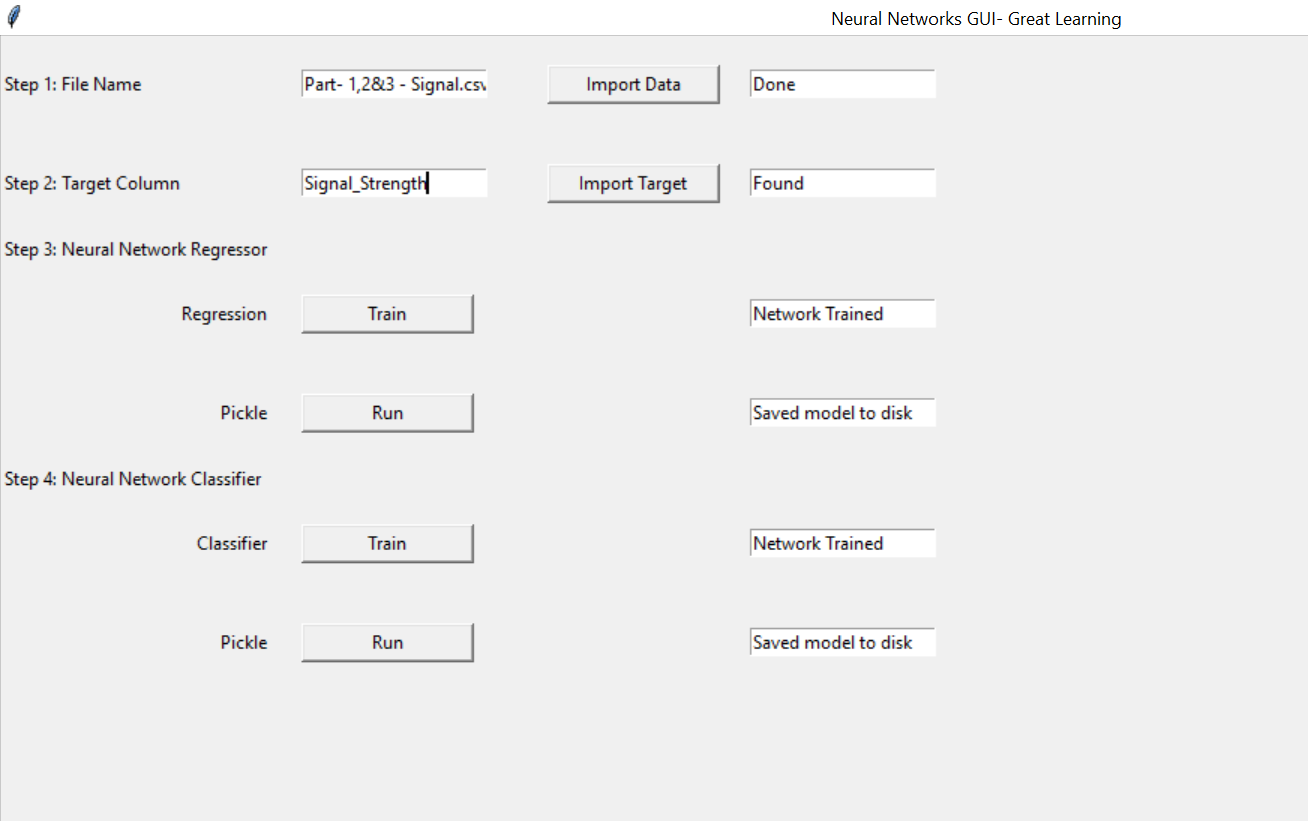




## ********************************Part 4 *********************************** ##

In [192]:
from google.colab import drive

In [193]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [194]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras import initializers, optimizers

In [196]:
hf=h5py.File("/content/gdrive/MyDrive/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')

In [197]:
#checking keys of h5 file
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [198]:
##get train and test data
X_train= hf.get('X_train')
X_test= hf.get('X_test')
X_val= hf.get('X_val')
y_train= hf.get('y_train')
y_test=hf.get('y_test')
y_val=hf.get('y_val')

In [199]:
print('shape of train data',X_train.shape)
print('shape of train label data',y_train.shape)
print('shape of validation data',X_val.shape)
print('shape of validation label data',y_val.shape)
print('shape of test data',X_test.shape)
print('shape of test label data',y_test.shape)

shape of train data (42000, 32, 32)
shape of train label data (42000,)
shape of validation data (60000, 32, 32)
shape of validation label data (60000,)
shape of test data (18000, 32, 32)
shape of test label data (18000,)


In [200]:
## image size is 32X32 with only one channel

Label: 8


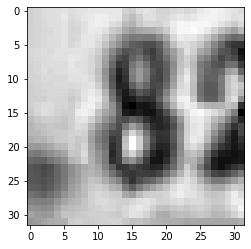

In [201]:
print("Label: {}".format(y_train[81]))
plt.imshow(X_train[81], cmap='gray')

In [202]:
# hf.close()

1. Reshape train and test sets into compatible shapes
2. Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
3. n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
4. do not reshape labels

In [203]:
X_train = np.array(X_train).reshape(X_train.shape[0], 32, 32, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], 32, 32, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], 32, 32, 1)

Normalize data
1. we must normalize our data as it is always required in neural network models  
2. we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
3. normalize X_train and X_test
make sure that the values are float so that we can get decimal points after *division*

In [204]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
X_val /=255

Print shape of data and number of images
1.   print shape of X_train
2.   print number of images in X_train
3.   print number of images in X_test

One-hot encode the class vector

convert y_train and y_test
number of classes: 10
we are doing this to use categorical_crossentropy as loss

*   convert class vectors (integers) to binary class matrix
*   convert y_train and y_test
*   number of classes: 10
*   we are doing this to use categorical_crossentropy as loss


In [205]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[81])

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# DNN
Initialize a sequential model

1.   flatten the data,add Flatten later
2.   flatten layers flatten 2D arrays to 1D array before building the fully connected layers
3.   add dense layers
4.   the final Dense layer must have neurons equal to the number of output **classes**


In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_DNN1 = Sequential()
model_DNN1.add(Flatten())
model_DNN1.add(Dense(128, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Dense(100, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Dense(55, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Dense(10, activation="softmax"))

In [207]:
# Compile the model
model_DNN1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
# Fit the model
history=model_DNN1.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1313/1313 [==============================] - 9s 6ms/step - loss: 2.0484 - accuracy: 0.2991 - val_loss: 1.7165 - val_accuracy: 0.4525
Epoch 2/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.3151 - accuracy: 0.5751 - val_loss: 1.4690 - val_accuracy: 0.5262
Epoch 3/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.1620 - accuracy: 0.6304 - val_loss: 1.7201 - val_accuracy: 0.4424
Epoch 4/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.0970 - accuracy: 0.6518 - val_loss: 1.2088 - val_accuracy: 0.6233
Epoch 5/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.0720 - accuracy: 0.6629 - val_loss: 2.1731 - val_accuracy: 0.3865
Epoch 6/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.0950 - accuracy: 0.6517 - val_loss: 1.5056 - val_accuracy: 0.5332
Epoch 7/50
1313/1313 [==============================] - 8s 6ms/step - loss: 1.2394 - accuracy: 0.6035 - val_loss: 1.3149 - val_accuracy:

In [208]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


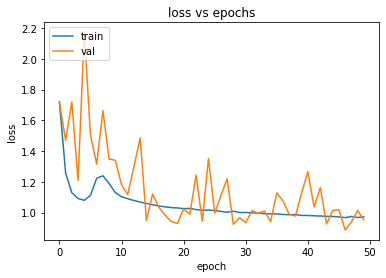

In [209]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

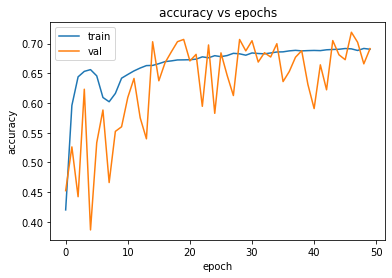

In [210]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [212]:
# Compile the model
model_DNN2 = Sequential()
model_DNN2.add(Flatten())
model_DNN2.add(Dense(128, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN2.add(BatchNormalization())
model_DNN2.add(Dense(100, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN2.add(BatchNormalization())
model_DNN2.add(Dense(55, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN2.add(BatchNormalization())
model_DNN2.add(Dense(10, activation="softmax"))


callback = callbacks.EarlyStopping(monitor='loss', patience=3)
model_DNN2.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer=optimizers.SGD(lr=0.0001))
# Fit the model
history=model_DNN2.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.8806 - accuracy: 0.1023 - val_loss: 2.6916 - val_accuracy: 0.1281
Epoch 2/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.6311 - accuracy: 0.1280 - val_loss: 2.5318 - val_accuracy: 0.1520
Epoch 3/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.4992 - accuracy: 0.1485 - val_loss: 2.4160 - val_accuracy: 0.1800
Epoch 4/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.4047 - accuracy: 0.1725 - val_loss: 2.3164 - val_accuracy: 0.2070
Epoch 5/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3074 - accuracy: 0.1973 - val_loss: 2.2223 - val_accuracy: 0.2370
Epoch 6/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2223 - accuracy: 0.2248 - val_loss: 2.1510 - val_accuracy: 0.2630
Epoch 7/50
1313/1313 [==============================] - 8s 6ms/step - loss: 2.1621 - accuracy: 0.2492 - val_loss: 2.0781 - val_accuracy:

In [213]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


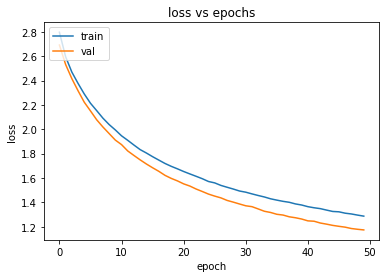

In [214]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

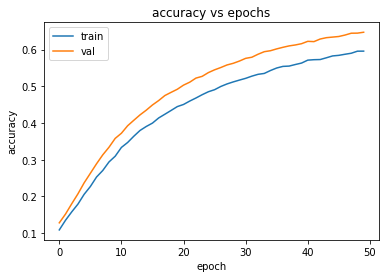

In [215]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [216]:
model_DNN3 = Sequential()
model_DNN3.add(Flatten())
model_DNN3.add(Dense(128, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN3.add(BatchNormalization())
model_DNN3.add(Dense(100, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN3.add(BatchNormalization())
model_DNN3.add(Dense(55, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN3.add(BatchNormalization())
model_DNN3.add(Dense(25, activation="relu",kernel_initializer=initializers.HeNormal()))
model_DNN3.add(BatchNormalization())
model_DNN3.add(Dense(10, activation="softmax"))


model_DNN3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers.SGD(lr=0.0001))
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
# # Fit the model
history=model_DNN3.fit(x=X_train, y=y_train, batch_size=32, epochs=25, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/25
1313/1313 [==============================] - 9s 7ms/step - loss: 2.8150 - accuracy: 0.1061 - val_loss: 2.6668 - val_accuracy: 0.1235
Epoch 2/25
1313/1313 [==============================] - 9s 6ms/step - loss: 2.6054 - accuracy: 0.1238 - val_loss: 2.5377 - val_accuracy: 0.1404
Epoch 3/25
1313/1313 [==============================] - 8s 6ms/step - loss: 2.5005 - accuracy: 0.1401 - val_loss: 2.4463 - val_accuracy: 0.1576
Epoch 4/25
1313/1313 [==============================] - 8s 6ms/step - loss: 2.4239 - accuracy: 0.1557 - val_loss: 2.3741 - val_accuracy: 0.1752
Epoch 5/25
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3605 - accuracy: 0.1680 - val_loss: 2.3103 - val_accuracy: 0.1918
Epoch 6/25
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3052 - accuracy: 0.1843 - val_loss: 2.2441 - val_accuracy: 0.2114
Epoch 7/25
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2517 - accuracy: 0.1990 - val_loss: 2.1946 - val_accuracy:

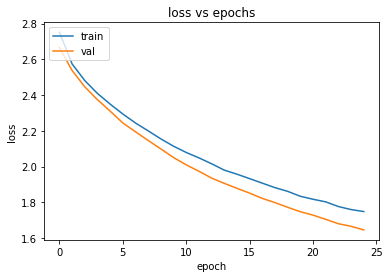

In [217]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

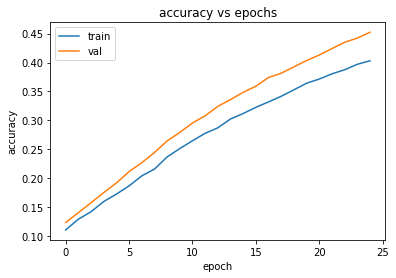

In [218]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [219]:
# evaluate the model
scores = model_DNN1.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_DNN1.metrics_names[1], scores[1]*100))

accuracy: 68.55%


In [220]:
# evaluate the model
scores = model_DNN2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_DNN2.metrics_names[1], scores[1]*100))

accuracy: 64.04%


In [221]:
# evaluate the model
scores = model_DNN3.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_DNN3.metrics_names[1], scores[1]*100))

accuracy: 44.74%


Summary : 
1. Model with Relu activation and He_normal initialization is working best.
2. model with he_normlization and Relu, shows train and test performance
3. test shoes more volatility than train, train show gradual increase in acuracy and gradual decrease in loss.
4. with transfer learning this model can be improved.